# SUPPORT VECTOR MACHINE

In [1]:
import pandas as pd
import numpy as np


In [2]:
data = pd.read_csv('mushroom.csv')

In [3]:
data.head(10)

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245
5,389,convex,grooves,pink,no,spicy,attached,crowded,broad,orange,...,universal,white,one,sheathing,white,scattered,woods,poisonous,4.337043,16.189338
6,330,bell,smooth,brown,no,anise,free,distant,broad,buff,...,partial,white,two,flaring,green,scattered,leaves,poisonous,12.702359,24.662015
7,98,conical,fibrous,white,yes,none,notched,close,narrow,black,...,partial,brown,one,large,orange,several,woods,poisonous,11.963690,19.408506
8,597,conical,grooves,green,yes,pungent,attached,crowded,narrow,buff,...,universal,yellow,two,evanescent,chocolate,solitary,woods,edible,14.272490,13.260537
9,16,convex,scaly,brown,yes,almond,attached,crowded,broad,red,...,partial,white,none,zone,green,clustered,leaves,poisonous,11.842597,4.216489


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2000 non-null   int64  
 1   cap_shape                 2000 non-null   object 
 2   cap_surface               2000 non-null   object 
 3   cap_color                 2000 non-null   object 
 4   bruises                   2000 non-null   object 
 5   odor                      2000 non-null   object 
 6   gill_attachment           2000 non-null   object 
 7   gill_spacing              2000 non-null   object 
 8   gill_size                 2000 non-null   object 
 9   gill_color                2000 non-null   object 
 10  stalk_shape               2000 non-null   object 
 11  stalk_root                2000 non-null   object 
 12  stalk_surface_above_ring  2000 non-null   object 
 13  stalk_surface_below_ring  2000 non-null   object 
 14  stalk_co

In [9]:
data.isnull().sum()

Unnamed: 0                  0
cap_shape                   0
cap_surface                 0
cap_color                   0
bruises                     0
odor                        0
gill_attachment             0
gill_spacing                0
gill_size                   0
gill_color                  0
stalk_shape                 0
stalk_root                  0
stalk_surface_above_ring    0
stalk_surface_below_ring    0
stalk_color_above_ring      0
stalk_color_below_ring      0
veil_type                   0
veil_color                  0
ring_number                 0
ring_type                   0
spore_print_color           0
population                  0
habitat                     0
class                       0
stalk_height                0
cap_diameter                0
dtype: int64

array([[<Axes: title={'center': 'Unnamed: 0'}>,
        <Axes: title={'center': 'stalk_height'}>],
       [<Axes: title={'center': 'cap_diameter'}>, <Axes: >]], dtype=object)

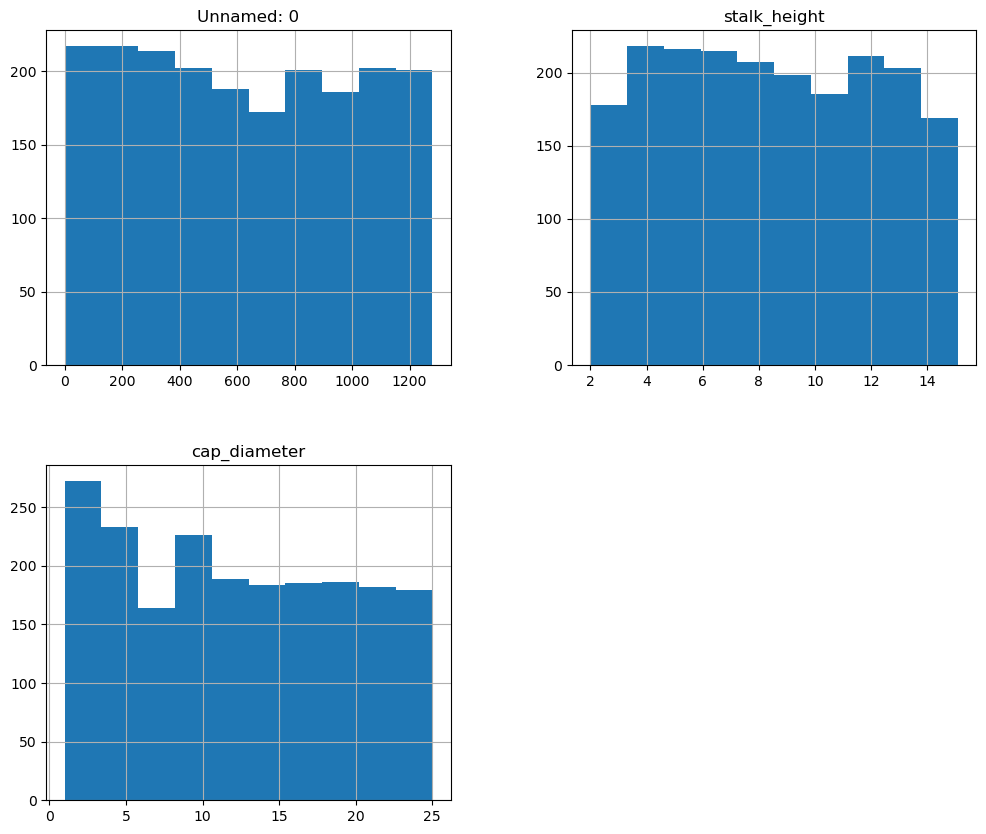

In [11]:
data.hist(figsize = (12,10))

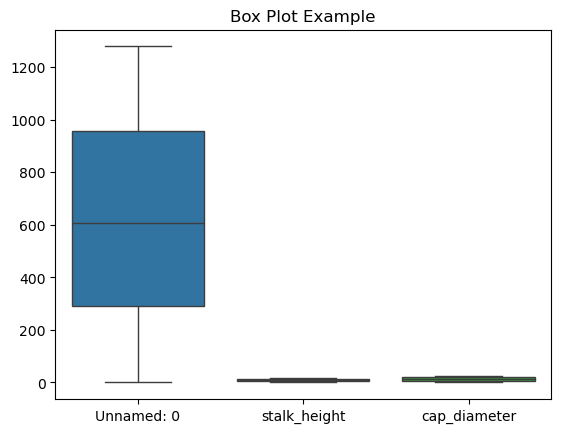

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(data= data)
plt.title("Box Plot Example")
plt.show()


In [13]:
# Data PreProcessing:


# SUPPORT VECTOR MACHINE

In [14]:
from sklearn.preprocessing import LabelEncoder
Categorical = data.select_dtypes(include=['object']).columns
le = LabelEncoder()
for col in Categorical:
    data[col] = le.fit_transform(data[col])
data.head()

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,4,2,7,0,1,1,2,0,7,...,0,0,2,6,3,1,5,1,14.276173,5.054983
1,1037,4,0,6,0,1,3,1,1,3,...,1,0,2,6,1,2,5,0,3.952715,19.068319
2,309,3,1,5,1,4,1,1,0,8,...,1,3,2,6,6,0,5,1,9.054265,7.205884
3,282,0,2,4,1,3,3,0,0,6,...,0,3,2,0,4,1,0,1,5.226499,20.932692
4,820,3,3,8,1,5,2,1,1,6,...,1,2,0,4,8,1,4,1,14.037532,12.545245


# Data Visualization

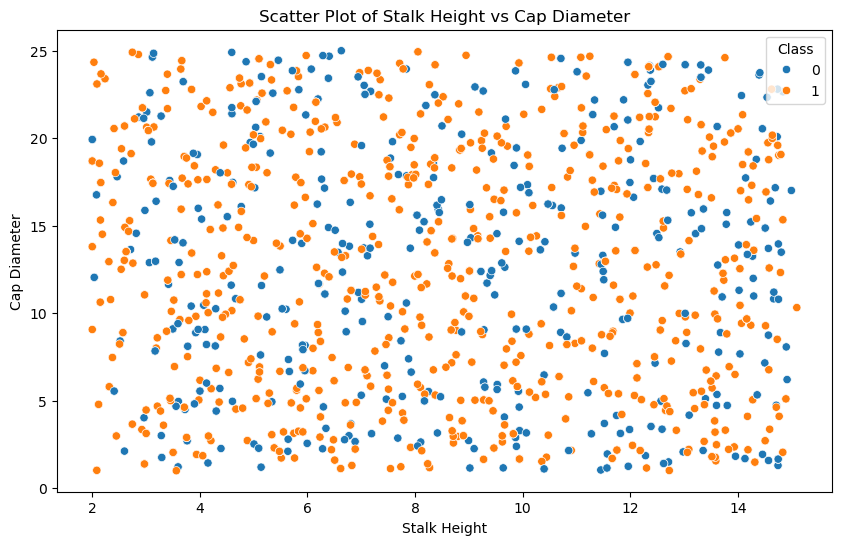

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot between stalk_height and cap_diameter
plt.figure(figsize=(10, 6))
sns.scatterplot(x='stalk_height', y='cap_diameter', hue='class', data=data)
plt.title('Scatter Plot of Stalk Height vs Cap Diameter')
plt.xlabel('Stalk Height')
plt.ylabel('Cap Diameter')
plt.legend(title='Class')
plt.show()

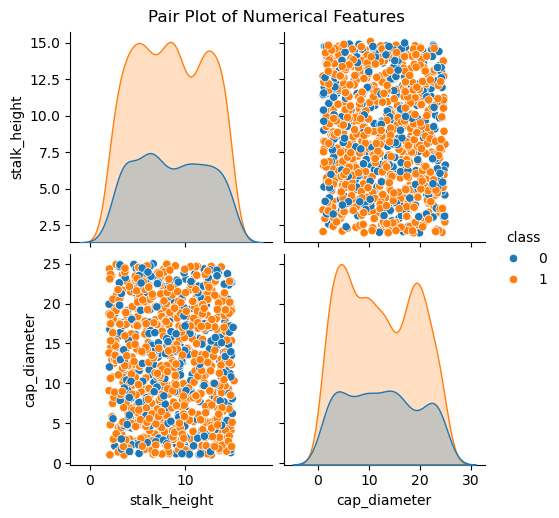

In [22]:
# Pair plot for selected numerical features
sns.pairplot(data[['stalk_height', 'cap_diameter', 'class']], hue='class', diag_kind='kde')
plt.suptitle('Pair Plot of Numerical Features', y=1.02)
plt.show()

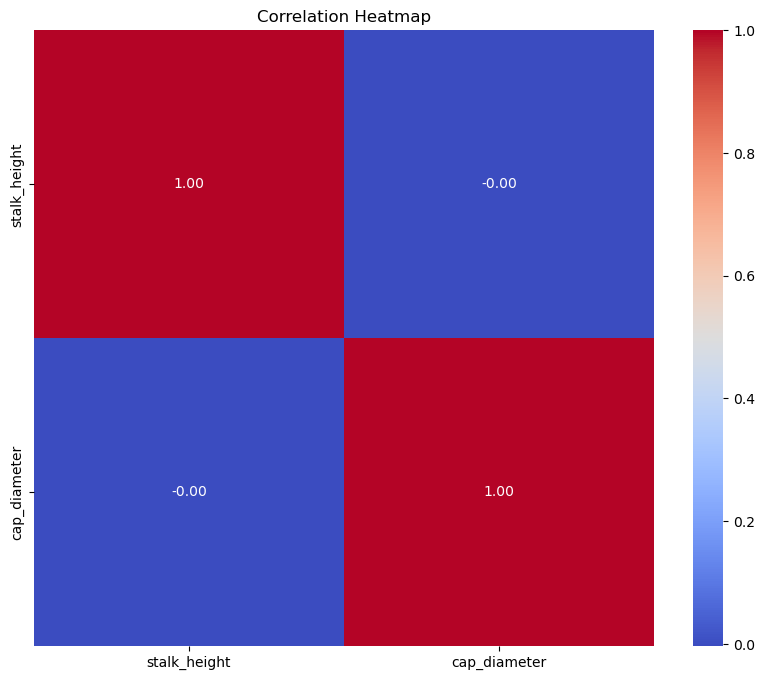

In [24]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
corr = data[['stalk_height', 'cap_diameter']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

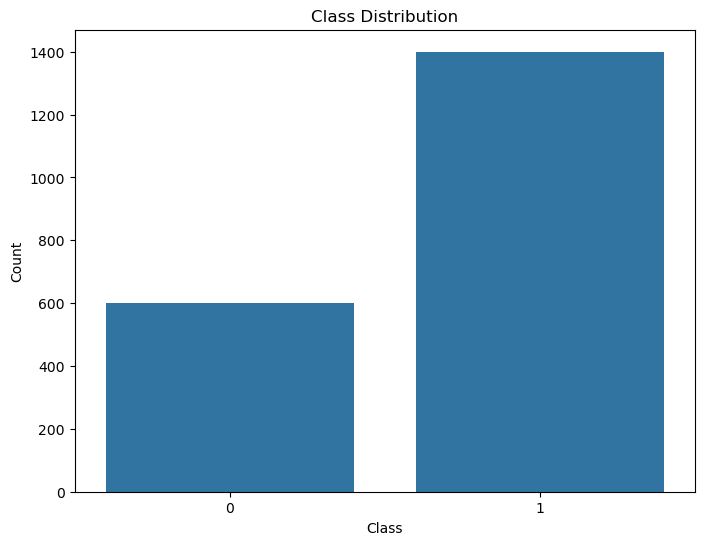

In [27]:
# Bar plot for class distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='class', data=data)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

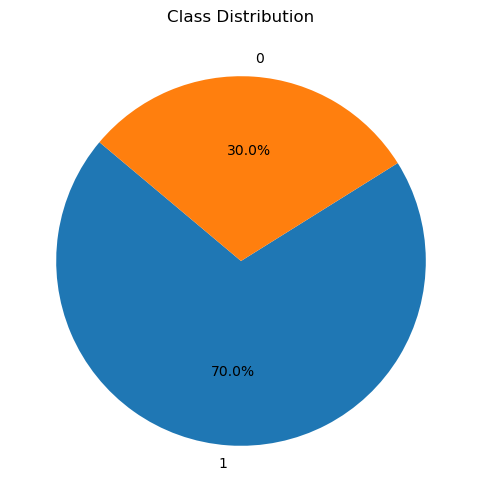

In [29]:
# Pie chart for class distribution
class_counts = data['class'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Class Distribution')
plt.show()

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix,classification_report

In [33]:
X_train = data.drop('class', axis = 1)
y_train = data['class']

In [35]:
X_train.head()

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,stalk_height,cap_diameter
0,1167,4,2,7,0,1,1,2,0,7,...,8,0,0,2,6,3,1,5,14.276173,5.054983
1,1037,4,0,6,0,1,3,1,1,3,...,0,1,0,2,6,1,2,5,3.952715,19.068319
2,309,3,1,5,1,4,1,1,0,8,...,3,1,3,2,6,6,0,5,9.054265,7.205884
3,282,0,2,4,1,3,3,0,0,6,...,5,0,3,2,0,4,1,0,5.226499,20.932692
4,820,3,3,8,1,5,2,1,1,6,...,7,1,2,0,4,8,1,4,14.037532,12.545245


In [37]:
y_train.head()

0    1
1    0
2    1
3    1
4    1
Name: class, dtype: int32

In [39]:
from sklearn.preprocessing import  StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.2, random_state = 42)


# SVM Implementation

In [43]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix,classification_report


In [45]:
# Grid Seach CV

In [47]:
clf = SVC()
param_grid = [ {'kernel':['rbf'],'gamma':[50,5,10,0.5], 'C':[15,14,13,12,11,10,0.1,0.001] }] 
gsv = GridSearchCV(clf,param_grid)
gsv.fit(X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid=[{'C': [15, 14, 13, 12, 11, 10, 0.1, 0.001],
                          'gamma': [50, 5, 10, 0.5], 'kernel': ['rbf']}])

In [48]:
gsv.best_params_, gsv.best_score_

({'C': 15, 'gamma': 50, 'kernel': 'rbf'}, 0.8512500000000001)

In [51]:
clf = SVC(C = 15, gamma = 50)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)
print("Classification Report:", classification_report(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred, average='weighted', zero_division = -0))
print('Recall:', recall_score(y_test, y_pred,average = 'weighted',zero_division = 0))
print('F1 Score:' , f1_score(y_test, y_pred, average='weighted',zero_division = 0))
print('Confusion Matrix:\n' ,confusion_matrix(y_test, y_pred))

Accuracy: 0.885
Classification Report:               precision    recall  f1-score   support

           0       1.00      0.65      0.79       133
           1       0.85      1.00      0.92       267

    accuracy                           0.89       400
   macro avg       0.93      0.83      0.86       400
weighted avg       0.90      0.89      0.88       400

Precision: 0.9019009584664537
Recall: 0.885
F1 Score: 0.8775376175548589
Confusion Matrix:
 [[ 87  46]
 [  0 267]]


# Visualization of SVM Results

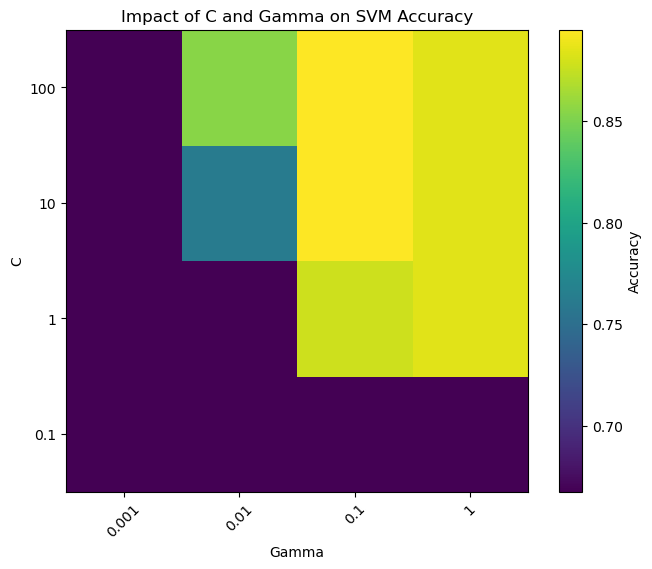

In [53]:
import matplotlib.pyplot as plt

# Example: Visualize the impact of C and gamma for an RBF kernel
C_values = [0.1, 1, 10, 100]
gamma_values = [0.001, 0.01, 0.1, 1]
accuracy_matrix = np.zeros((len(C_values), len(gamma_values)))

for i, C in enumerate(C_values):
    for j, gamma in enumerate(gamma_values):
        model = SVC(kernel='rbf', C=C, gamma=gamma)
        model.fit(X_train, y_train)
        accuracy_matrix[i, j] = accuracy_score(y_test, model.predict(X_test))

# Plot the heatmap
plt.figure(figsize=(8, 6))
plt.imshow(accuracy_matrix, cmap='viridis', origin='lower')
plt.colorbar(label='Accuracy')
plt.xticks(np.arange(len(gamma_values)), gamma_values, rotation=45)
plt.yticks(np.arange(len(C_values)), C_values)
plt.xlabel('Gamma')
plt.ylabel('C')
plt.title('Impact of C and Gamma on SVM Accuracy')
plt.show()

# Parameter Tuning and Optimization

In [55]:
param_grid1 = [ {'kernel':['linear'],'gamma':[50,5,10,0.5], 'C':[15,14,13,12,11,10,0.1,0.001] }] 

In [57]:
# Initialize SVM model
svm_model = SVC()

# Perform Grid Search
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid1, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

# Evaluate on test data
y_pred = grid_search.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Best Parameters: {'C': 15, 'gamma': 50, 'kernel': 'linear'}
Best Cross-Validation Accuracy: 0.7081250000000001
Test Accuracy: 0.6675
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       133
           1       0.67      1.00      0.80       267

    accuracy                           0.67       400
   macro avg       0.33      0.50      0.40       400
weighted avg       0.45      0.67      0.53       400



C:\Users\basan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\basan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\basan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Comparison and Analysis

In [66]:
# Define kernels to compare
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

# Store results
results = {
    'kernel': [],
    'accuracy': [],
    'classification_report': []
}

# Train and evaluate for each kernel
for kernel in kernels:
    print(f"Training SVM with {kernel} kernel...")
    model = SVC(kernel=kernel, random_state=42)
    model.fit(X_train, y_train)
    
    # Predict on test data
    y_pred = model.predict(X_test)
    
    # Evaluate performance
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    
    # Store results
    results['kernel'].append(kernel)
    results['accuracy'].append(accuracy)
    results['classification_report'].append(report)
    
    print(f"Accuracy with {kernel} kernel: {accuracy:.4f}")
    print(f"Classification Report:\n{report}\n")

Training SVM with linear kernel...


C:\Users\basan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\basan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\basan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy with linear kernel: 0.6675
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       133
           1       0.67      1.00      0.80       267

    accuracy                           0.67       400
   macro avg       0.33      0.50      0.40       400
weighted avg       0.45      0.67      0.53       400


Training SVM with poly kernel...
Accuracy with poly kernel: 0.8250
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.53      0.67       133
           1       0.81      0.97      0.88       267

    accuracy                           0.82       400
   macro avg       0.85      0.75      0.78       400
weighted avg       0.84      0.82      0.81       400


Training SVM with rbf kernel...
Accuracy with rbf kernel: 0.7850
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.38      0.54       13

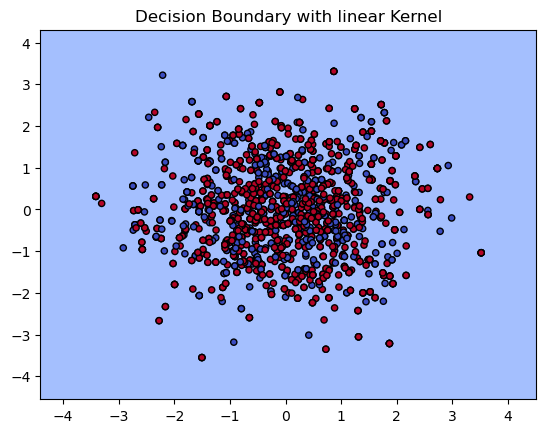

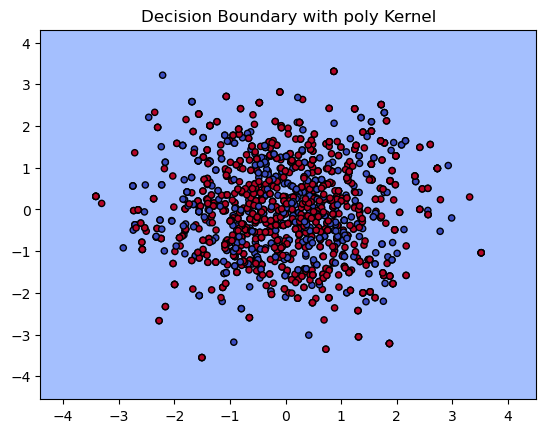

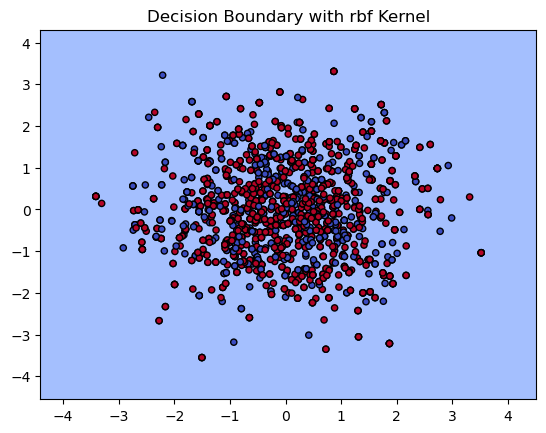

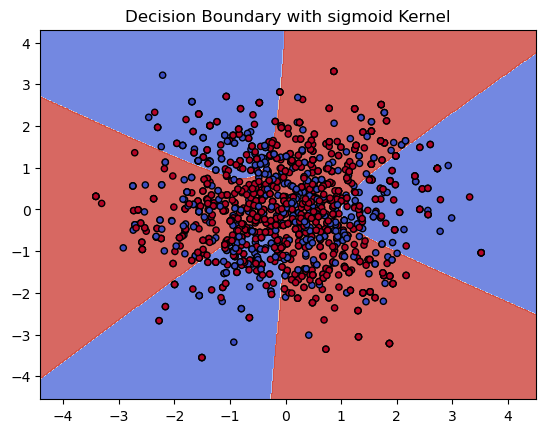

In [68]:
# Reduce data to 2D using PCA (for visualization)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_train_2d = pca.fit_transform(X_train)
X_test_2d = pca.transform(X_test)

# Plot decision boundaries for each kernel
def plot_decision_boundary(kernel):
    model = SVC(kernel=kernel, random_state=42)
    model.fit(X_train_2d, y_train)
    
    # Create a mesh to plot in
    x_min, x_max = X_train_2d[:, 0].min() - 1, X_train_2d[:, 0].max() + 1
    y_min, y_max = X_train_2d[:, 1].min() - 1, X_train_2d[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    
    # Predict for each point in the mesh
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot the decision boundary
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
    plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=y_train, s=20, edgecolor='k', cmap=plt.cm.coolwarm)
    plt.title(f'Decision Boundary with {kernel} Kernel')
    plt.show()

# Plot for each kernel
for kernel in kernels:
    plot_decision_boundary(kernel)

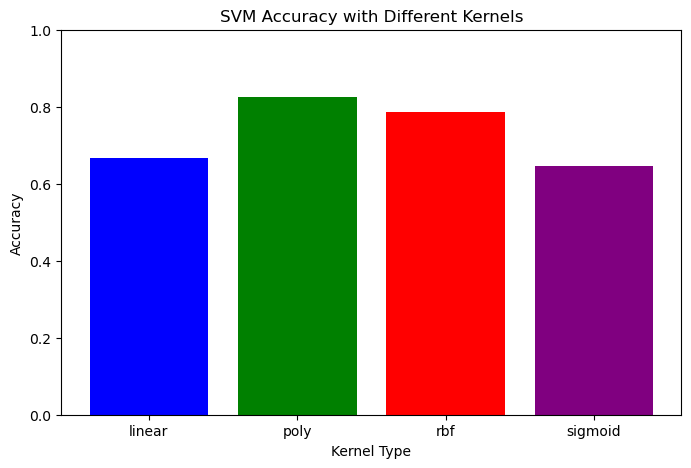

In [70]:
# Plot accuracy for each kernel
plt.figure(figsize=(8, 5))
plt.bar(results['kernel'], results['accuracy'], color=['blue', 'green', 'red', 'purple'])
plt.xlabel('Kernel Type')
plt.ylabel('Accuracy')
plt.title('SVM Accuracy with Different Kernels')
plt.ylim(0, 1.0)
plt.show()